In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
train = pd.read_csv('train.csv')
users = pd.read_csv('users.csv')
test = pd.read_csv('test.csv')

In [18]:
print('Train size: ', len(train))
print('Test size: ', len(test))
train

Train size:  73539
Test size:  55970


,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,2,2019-09-02 00:00:00+08:00,127696,32,Never open,Never login,Never checkout,0,0,0,0,0,0,0,0,0,0,73536
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,Never checkout,2,4,4,0,0,0,0,0,0,1,73537


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 73539 non-null  int64 
 1   grass_date                   73539 non-null  object
 2   user_id                      73539 non-null  int64 
 3   subject_line_length          73539 non-null  int64 
 4   last_open_day                73539 non-null  object
 5   last_login_day               73539 non-null  object
 6   last_checkout_day            73539 non-null  object
 7   open_count_last_10_days      73539 non-null  int64 
 8   open_count_last_30_days      73539 non-null  int64 
 9   open_count_last_60_days      73539 non-null  int64 
 10  login_count_last_10_days     73539 non-null  int64 
 11  login_count_last_30_days     73539 non-null  int64 
 12  login_count_last_60_days     73539 non-null  int64 
 13  checkout_count_last_10_days  73

In [20]:
train['grass_date'] = pd.to_datetime(train['grass_date'])
test['grass_date'] = pd.to_datetime(test['grass_date'])

In [21]:
for x in ['last_open_day', 'last_login_day', 'last_checkout_day']:
    print(train[~train[x].str.isnumeric()][x].unique())

['Never open']
['Never login']
['Never checkout']


- last_open_day: 'Never open' → max
- last_login_day: 'Never login' → max
- last_checkout_day: 'Never checkout' → max

In [22]:
for x in ['last_open_day', 'last_login_day', 'last_checkout_day']:
    train[x] = train[x].apply(lambda x: x if x.isnumeric() else -1)
    test[x] = test[x].apply(lambda x: x if x.isnumeric() else -1)

    train[x] = train[x].astype(int)
    test[x] = test[x].astype(int)

    max_value = train[x].max()
    train[x] = train[x].apply(lambda x: max_value if x==-1 else x)
    test[x] = test[x].apply(lambda x: max_value if x==-1 else x)

In [23]:
train.iloc[1739]

country_code                                           2
grass_date                     2019-07-16 00:00:00+08:00
user_id                                            90499
subject_line_length                                   46
last_open_day                                        808
last_login_day                                     18141
last_checkout_day                                   1445
open_count_last_10_days                                0
open_count_last_30_days                                0
open_count_last_60_days                                2
login_count_last_10_days                               0
login_count_last_30_days                               0
login_count_last_60_days                               0
checkout_count_last_10_days                            0
checkout_count_last_30_days                            0
checkout_count_last_60_days                            0
open_flag                                              0
row_id                         

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype                                
---  ------                       --------------  -----                                
 0   country_code                 73539 non-null  int64                                
 1   grass_date                   73539 non-null  datetime64[ns, pytz.FixedOffset(480)]
 2   user_id                      73539 non-null  int64                                
 3   subject_line_length          73539 non-null  int64                                
 4   last_open_day                73539 non-null  int64                                
 5   last_login_day               73539 non-null  int64                                
 6   last_checkout_day            73539 non-null  int64                                
 7   open_count_last_10_days      73539 non-null  int64                                
 8   open_c

In [25]:
users

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com
...,...,...,...,...,...,...
127881,127921,NaN,1.0,0.0,NaN,@yahoo.com
127882,127922,1.0,1.0,0.0,20.0,@gmail.com
127883,127923,NaN,1.0,0.0,NaN,@gmail.com
127884,127924,NaN,0.0,0.0,NaN,@gmail.com


In [26]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127886 entries, 0 to 127885
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  127886 non-null  int64  
 1   attr_1   78987 non-null   float64
 2   attr_2   127439 non-null  float64
 3   attr_3   127886 non-null  float64
 4   age      78987 non-null   float64
 5   domain   127886 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


In [27]:
users['attr_1'] = users['attr_1'].fillna(0)
users['attr_2'] = users['attr_2'].fillna(0)

For now, don't use `age`

In [28]:
new_train = pd.merge(train, users, left_on='user_id', right_on='user_id', how='inner')
new_test = pd.merge(test, users, left_on='user_id', right_on='user_id', how='inner')

In [29]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73539 entries, 0 to 73538
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype                                
---  ------                       --------------  -----                                
 0   country_code                 73539 non-null  int64                                
 1   grass_date                   73539 non-null  datetime64[ns, pytz.FixedOffset(480)]
 2   user_id                      73539 non-null  int64                                
 3   subject_line_length          73539 non-null  int64                                
 4   last_open_day                73539 non-null  int64                                
 5   last_login_day               73539 non-null  int64                                
 6   last_checkout_day            73539 non-null  int64                                
 7   open_count_last_10_days      73539 non-null  int64                                
 8   open_c

In [30]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55970 entries, 0 to 55969
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype                                
---  ------                       --------------  -----                                
 0   country_code                 55970 non-null  int64                                
 1   grass_date                   55970 non-null  datetime64[ns, pytz.FixedOffset(480)]
 2   user_id                      55970 non-null  int64                                
 3   subject_line_length          55970 non-null  int64                                
 4   last_open_day                55970 non-null  int64                                
 5   last_login_day               55970 non-null  int64                                
 6   last_checkout_day            55970 non-null  int64                                
 7   open_count_last_10_days      55970 non-null  int64                                
 8   open_c

In [31]:
new_train['day_of_week'] = new_train['grass_date'].dt.dayofweek
new_test['day_of_week'] = new_test['grass_date'].dt.dayofweek

new_train.sample(5).loc[:, ['grass_date', 'day_of_week']]

,grass_date,day_of_week
68723,2019-09-01 00:00:00+08:00,6
13953,2019-07-25 00:00:00+08:00,3
36928,2019-08-08 00:00:00+08:00,3
24422,2019-08-01 00:00:00+08:00,3
55216,2019-08-22 00:00:00+08:00,3


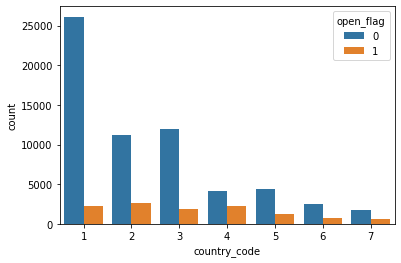

In [32]:
sns.countplot(x='country_code', hue='open_flag', data=new_train)

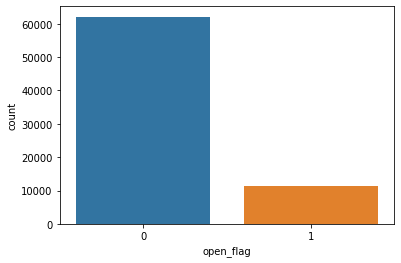

In [33]:
sns.countplot(x='open_flag', data=new_train)

In [34]:
TEST_SIZE = 1000
test_data = pd.DataFrame(columns=new_train.columns)

for i in range(2):
    df = new_train[new_train['open_flag'] == i]
    df = df.sample(1000, random_state=0)
    test_data = test_data.append(df, ignore_index=True)

test_data

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id,attr_1,attr_2,attr_3,age,domain,day_of_week
0,2,2019-08-07 00:00:00+08:00,807,38,28,6,11,0,0,1,...,11,14,0,32636,1.0,1.0,2.0,33.0,@gmail.com,2
1,2,2019-08-02 00:00:00+08:00,59411,58,4,16,16,3,8,12,...,1,1,0,24887,0.0,1.0,0.0,NaN,@gmail.com,4
2,2,2019-08-02 00:00:00+08:00,58400,58,1,484,1445,1,1,3,...,0,0,0,24881,0.0,1.0,0.0,NaN,@gmail.com,4
3,2,2019-07-16 00:00:00+08:00,75781,36,4,5,1445,3,8,13,...,0,0,0,1423,1.0,1.0,2.0,21.0,@gmail.com,1
4,6,2019-08-09 00:00:00+08:00,52916,53,1,158,1445,1,2,5,...,0,0,0,37292,0.0,1.0,0.0,NaN,@gmail.com,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,2019-07-25 00:00:00+08:00,109479,58,22,6,1445,3,6,6,...,0,0,1,15172,0.0,1.0,0.0,NaN,@gmail.com,3
1996,4,2019-08-16 00:00:00+08:00,17590,44,2,1,40,2,9,12,...,0,2,1,45182,1.0,1.0,1.0,33.0,@hotmail.com,4
1997,2,2019-08-29 00:00:00+08:00,26140,23,34,207,237,0,0,3,...,0,0,1,64184,0.0,1.0,0.0,NaN,@gmail.com,3
1998,2,2019-08-29 00:00:00+08:00,14612,23,29,6,22,0,1,8,...,2,7,1,64076,1.0,1.0,1.0,34.0,@gmail.com,3


In [35]:
new_train = new_train[~new_train['row_id'].isin(test_data['row_id'])]
new_train = new_train.reset_index(drop=True)
new_train

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id,attr_1,attr_2,attr_3,age,domain,day_of_week
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,...,5,10,0,0,1.0,1.0,2.0,47.0,@gmail.com,1
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,...,1,4,1,1,1.0,1.0,2.0,25.0,@hotmail.com,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,...,19,27,0,2,0.0,1.0,0.0,NaN,@yahoo.com,1
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,...,3,6,0,3,1.0,1.0,2.0,24.0,@yahoo.com,1
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,...,0,0,0,4,0.0,1.0,0.0,NaN,@hotmail.com,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,...,0,0,0,73534,0.0,1.0,0.0,NaN,@hotmail.com,0
71535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,...,0,0,0,73535,1.0,1.0,2.0,30.0,@gmail.com,0
71536,2,2019-09-02 00:00:00+08:00,127696,32,808,18141,1445,0,0,0,...,0,0,0,73536,0.0,0.0,0.0,NaN,@gmail.com,0
71537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,1445,2,4,4,...,0,0,1,73537,1.0,1.0,1.0,38.0,@gmail.com,0


In [36]:
test_data.to_csv('test_data.csv', index=False)
new_train.to_csv('train_data.csv', index=False)
new_test.to_csv('test_kaggle.csv', index=False)

In [25]:
features = [
    'subject_line_length',
    'last_open_day','last_login_day', 'last_checkout_day',
    'open_count_last_10_days', 'open_count_last_30_days',
    'open_count_last_60_days', 'login_count_last_10_days',
    'login_count_last_30_days', 'login_count_last_60_days',
    'checkout_count_last_10_days', 'checkout_count_last_30_days',
    'checkout_count_last_60_days', 
    'attr_1', 'attr_2', 'attr_3',
    'country_code', 'domain', 'day_of_week'
]

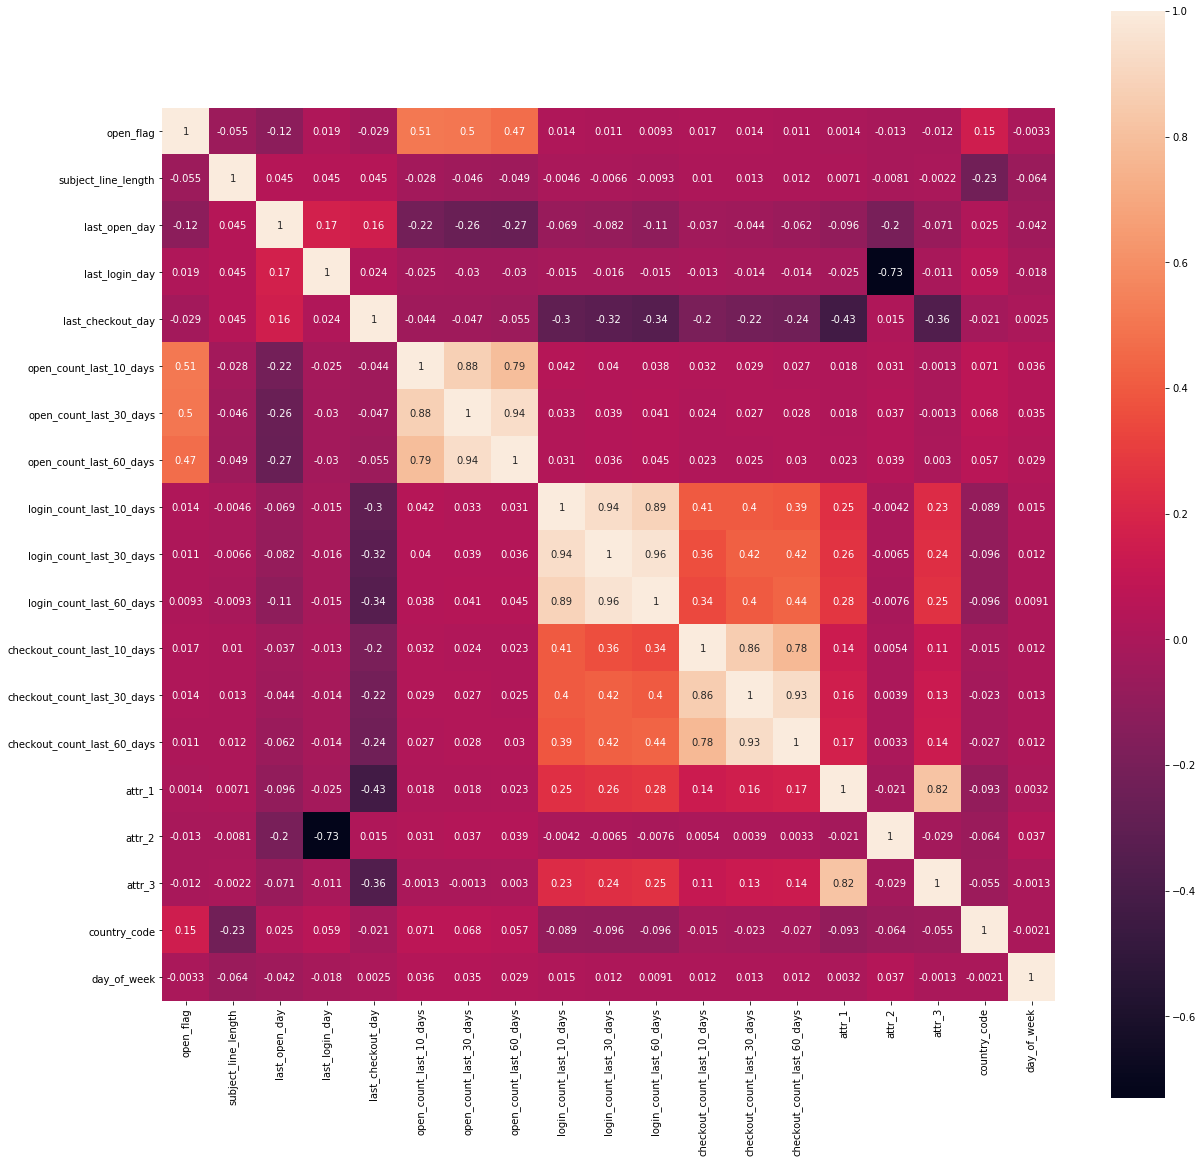

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(
    new_train.loc[:, ['open_flag'] + features].corr(), 
    square=True, annot=True
)

In [28]:
cont_features = [
    'subject_line_length',
    'last_open_day','last_login_day', 'last_checkout_day',
    'open_count_last_10_days', 'open_count_last_30_days',
    'open_count_last_60_days', 'login_count_last_10_days',
    'login_count_last_30_days', 'login_count_last_60_days',
    'checkout_count_last_10_days', 'checkout_count_last_30_days',
    'checkout_count_last_60_days',
]
cat_features = [
    'attr_1', 'attr_2', 'attr_3',
    'country_code', 'domain', 'day_of_week'
]

print('Number of continuous features: ', len(cont_features))
print('Number of categorical features: ', len(cat_features))

Number of continuous features:  13
Number of categorical features:  6


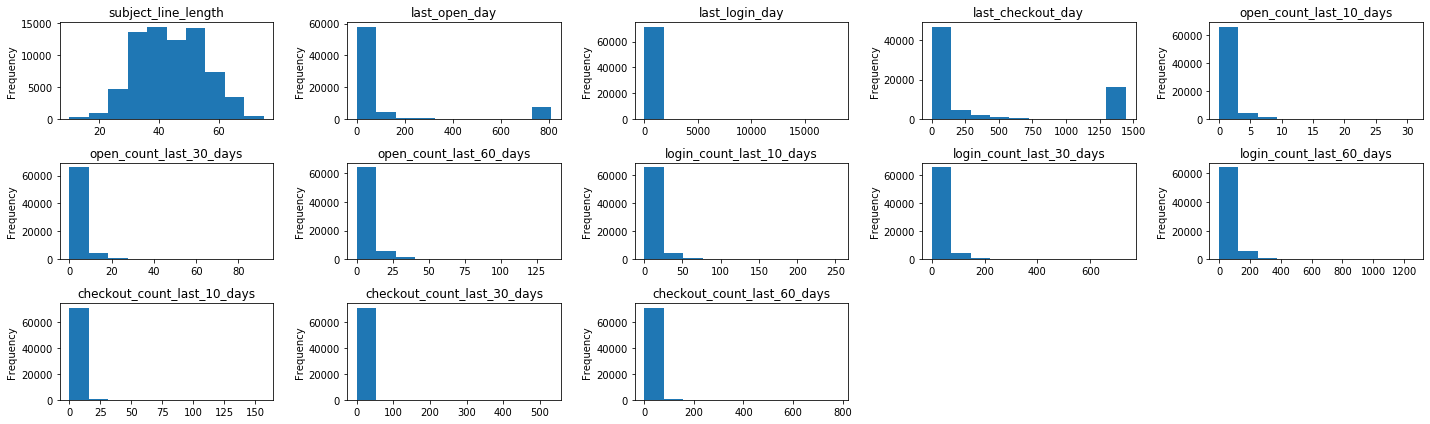

In [29]:
plt.figure(figsize=(20,6))
for i, x in enumerate(cont_features):
    plt.subplot(3, 5, i+1)
    new_train[x].plot.hist()
    plt.title(x)

plt.tight_layout()

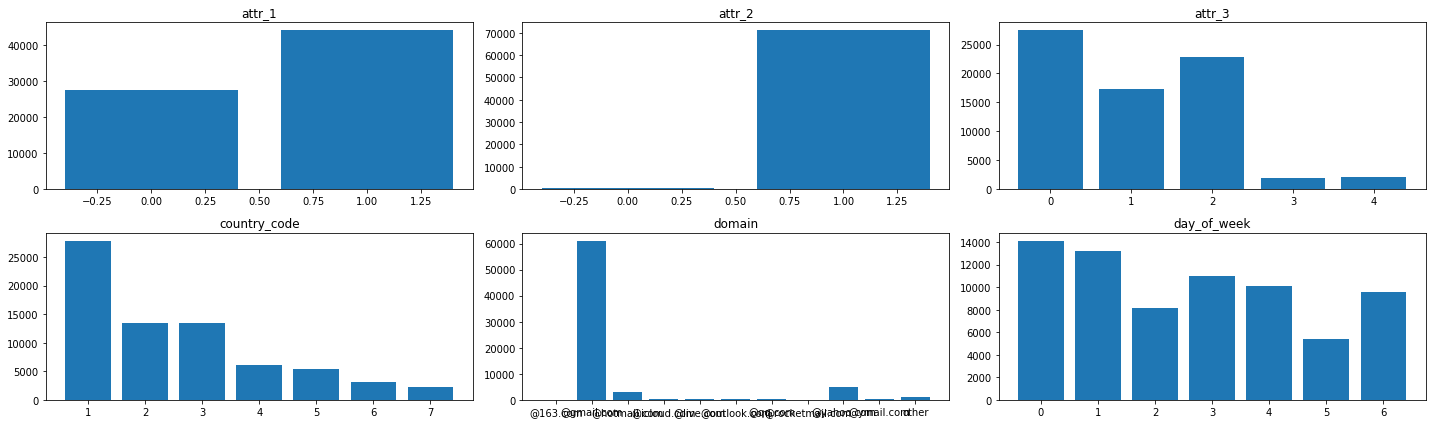

In [30]:
plt.figure(figsize=(20,6))
for i, x in enumerate(cat_features):
    plt.subplot(2, 3, i+1)
    count = new_train.groupby(x).count()['open_flag']
    plt.bar(count.index, count)
    plt.title(x)

plt.tight_layout()